# Loading the MNIST Dataset

The dataset consists of training set images, training set labels, test set images and test set labels which are taken as X_train,y_train,X_test and y_test.

In [1]:
import sys, os
import numpy as np
import gzip
import matplotlib.pyplot as plt

def load_dataset():
    # We first define a download function, supporting both Python 2 and 3.
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)
    

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        return data / np.float32(256)

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data

    # We can now download and read the training and test set images and labels.
    X_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')
    
    return X_train, y_train,X_test, y_test
X_train,y_train,X_test,y_test=load_dataset()

In [2]:
X_train=X_train.reshape(60000,784)
y_train=y_train.reshape(60000,1)
X_test=X_test.reshape(10000,784)
y_test=y_test.reshape(10000,1)

# Assigning values to the Learning rate, Threshold, Number of samples to be trained

Here the number of samples is 50

In [7]:
lr=1                                  #Setting the learning rate 1
n=50 

Initializing the Weight vector with random values Error with 0 and Epoch is set to 0

In [8]:
W=np.zeros((10,784))
W=np.random.rand(10,784)              #Initializing the weight vector 

errors=0                              #Initializing the misclassifications
Mc=[]                                 #Storing the misclassification values after every epoch
epoch=0


# Counting the misclassifications until the training dataset converges with respect to the given threshold

In [9]:
while(epoch==0 or Mc[epoch-1]/n > t): 
    errors = 0
    for i in range(n):
        v = np.matmul(W,X_train[i])
        c=np.argmax(v)

        
        if c != y_train[i]:
            errors=errors+1
#        elif c == y_train[i]:
#            errors=0
    
    Mc.append(errors)
        
    epoch=epoch+1


    for j in range(n):
        v1=np.matmul(W,X_train[j])      #W*Xi
        U=np.heaviside(v1,1)            #U(W*X)
        d=np.eye(10)[y_train[j]]
        Y=d-U                           #d(x)-U(W*X)
        Y=Y.reshape(10,1)
        X_tt=X_train[j].reshape(1,784)
        Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
        W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                          #W=W+lr*(d(x)-U(W*X))*X'


# Plot between Epochs and Misclassification of the training dataset with 50 samples

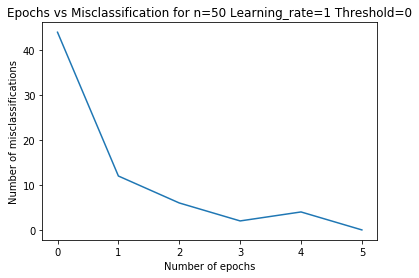

In [10]:
plt.plot(Mc)
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.title('Epochs vs Misclassification for n=50 Learning_rate=1 Threshold=0')
plt.show()

# Assigning values to the Learning rate, Threshold, Number of samples to be tested, Initializing Error with 0

Here the number of test samples is 10000

In [11]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=1
Mc=[]                                 #Storing the misclassification values after every epoch
n=10000                                  #Number of test elements

# Testing the test set images and lables with weights obtained in the previous step; Calculating the total number of misclassifications and percentage of misclassifications

With the updated weights in the previous step, we calculate the percentage of misclassifications in the test dataset. It is seen that the Percentage of misclassification is as high as 40.03. Since only 50 samples were trained, the testing phase came across alot of new examples which were misclassified.

In [12]:
for i in range(n):
    v = np.matmul(W,X_test[i])
    c=np.argmax(v)

        
    if c != y_test[i]:
        errors=errors+1
#        elif c == y_train[i]:
#            errors=0

print('Total number of misclassification: ',errors)
print('Percentage of misclassification: ',errors*100/n)
#    epoch=epoch+1

for j in range(n):
    v1=np.matmul(W,X_test[j])      #W*Xi
    U=np.heaviside(v1,1)            #U(W*X)
    d=np.eye(10)[y_test[j]]
    Y=d-U                           #d(x)-U(W*X)
    Y=Y.reshape(10,1)
    X_tt=X_test[j].reshape(1,784)
    Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
    W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                            #W=W+lr*(d(x)-U(W*X))*X'

Total number of misclassification:  4083
Percentage of misclassification:  40.83


# Assigning values to the Learning rate, Threshold, Number of samples to be trained, Initializing the Weight vector with random values Setting epoch to 0 and Error with 0
Here the number of training sample is 1000

In [13]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=0.1
t=0                                   #Setting the threshold to 5 misclassifications
Mc=[]                                 #Storing the misclassification values after every epoch
n=1000                                  #Number of training elements
epoch=0
W=np.zeros((10,784))
W=np.random.rand(10,784)

# Counting the misclassifications until the training dataset converges with respect to the given threshold

In [14]:
while(epoch==0 or Mc[epoch-1]/n > t): 
    errors = 0
    for i in range(n):
        v = np.matmul(W,X_train[i])
        c=np.argmax(v)

        
        if c != y_train[i]:
            errors=errors+1
#        elif c == y_train[i]:
#            errors=0
    
    Mc.append(errors)
    #print(Mc)    
    epoch=epoch+1


    for j in range(n):
        v1=np.matmul(W,X_train[j])      #W*Xi
        U=np.heaviside(v1,1)            #U(W*X)
        d=np.eye(10)[y_train[j]]
        Y=d-U                           #d(x)-U(W*X)
        Y=Y.reshape(10,1)
        X_tt=X_train[j].reshape(1,784)
        Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
        W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                        #W=W+lr*(d(x)-U(W*X))*X'

# Plot between Epochs and Misclassification of the training dataset with 1000 samples


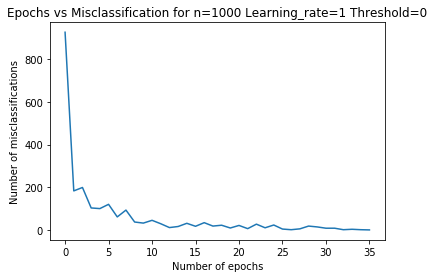

In [15]:
plt.plot(Mc)
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.title('Epochs vs Misclassification for n=1000 Learning_rate=1 Threshold=0')
plt.show()

# Assigning values to the Learning rate, Threshold, Number of samples to be tested, Initializing Error with 0


In [16]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=0.1
Mc=[]                                 #Storing the misclassification values after every epoch
n=10000                                  #Number of training elements

# Testing the test set images and lables with weights obtained in the previous step; Calculating the total number of misclassifications and percentage of misclassifications

With the updated weights in the previous step, we calculate the percentage of misclassifications in the test dataset. It is seen that the Percentage of misclassification is as high as 18.44. Here 1000 samples were trained and the testing phase came across few examples which were misclassified. On comparing the previous program with 50 samples, the percentage of misclassification has decreased and it was able to classify more samples in the test dataset.

In [17]:
for i in range(n):
    v = np.matmul(W,X_test[i])
    c=np.argmax(v)

        
    if c != y_test[i]:
        errors=errors+1
#        elif c == y_train[i]:
#            errors=0

print('Total number of misclassification: ',errors)
print('Percentage of misclassification: ',errors*100/n)
#    epoch=epoch+1

for j in range(n):
    v1=np.matmul(W,X_test[j])      #W*Xi
    U=np.heaviside(v1,1)            #U(W*X)
    d=np.eye(10)[y_test[j]]
    Y=d-U                           #d(x)-U(W*X)
    Y=Y.reshape(10,1)
    X_tt=X_test[j].reshape(1,784)
    Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
    W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                            #W=W+lr*(d(x)-U(W*X))*X'

Total number of misclassification:  1844
Percentage of misclassification:  18.44


# Assigning values to the Learning rate, Threshold, Number of samples to be trained, Initializing the Weight vector with random values Setting epoch to 0 and Error with 0

The entire training dataset with 60000 samples is taken.

In [20]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=0.1
t=0                                   #Setting the threshold to 5 misclassifications
Mc=[]                                 #Storing the misclassification values after every epoch
n=60000                                  #Number of training elements
epoch=0
W=np.zeros((10,784))
W=np.random.rand(10,784)

# Counting the misclassifications until the training dataset converges with respect to the given threshold

In [21]:
while(epoch==0 or Mc[epoch-1]/n > t): 
    errors = 0
    for i in range(n):
        v = np.matmul(W,X_train[i])
        c=np.argmax(v)

        
        if c != y_train[i]:
            errors=errors+1
#        elif c == y_train[i]:
#            errors=0
    
    Mc.append(errors)
    #print(Mc)    
    epoch=epoch+1
    print('Epoch:',epoch)
    print('Misclassifications:',errors)

    for j in range(n):
        v1=np.matmul(W,X_train[j])      #W*Xi
        U=np.heaviside(v1,1)            #U(W*X)
        d=np.eye(10)[y_train[j]]
        Y=d-U                           #d(x)-U(W*X)
        Y=Y.reshape(10,1)
        X_tt=X_train[j].reshape(1,784)
        Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
        W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                        #W=W+lr*(d(x)-U(W*X))*X'


Epoch: 1
Misclassifications: 57113
Epoch: 2
Misclassifications: 9093
Epoch: 3
Misclassifications: 10059
Epoch: 4
Misclassifications: 9460
Epoch: 5
Misclassifications: 10019
Epoch: 6
Misclassifications: 9022
Epoch: 7
Misclassifications: 10218
Epoch: 8
Misclassifications: 10014
Epoch: 9
Misclassifications: 8460
Epoch: 10
Misclassifications: 9110
Epoch: 11
Misclassifications: 9459
Epoch: 12
Misclassifications: 8971
Epoch: 13
Misclassifications: 8972
Epoch: 14
Misclassifications: 9386
Epoch: 15
Misclassifications: 9637
Epoch: 16
Misclassifications: 8181
Epoch: 17
Misclassifications: 8587
Epoch: 18
Misclassifications: 10376
Epoch: 19
Misclassifications: 9269
Epoch: 20
Misclassifications: 9063
Epoch: 21
Misclassifications: 9208
Epoch: 22
Misclassifications: 8390
Epoch: 23
Misclassifications: 9328
Epoch: 24
Misclassifications: 10209
Epoch: 25
Misclassifications: 8613
Epoch: 26
Misclassifications: 9387
Epoch: 27
Misclassifications: 9399
Epoch: 28
Misclassifications: 8817
Epoch: 29
Misclassific

Epoch: 232
Misclassifications: 8631
Epoch: 233
Misclassifications: 9073
Epoch: 234
Misclassifications: 8533
Epoch: 235
Misclassifications: 8842
Epoch: 236
Misclassifications: 8221
Epoch: 237
Misclassifications: 8871
Epoch: 238
Misclassifications: 8742
Epoch: 239
Misclassifications: 7679
Epoch: 240
Misclassifications: 8620
Epoch: 241
Misclassifications: 7759
Epoch: 242
Misclassifications: 8781
Epoch: 243
Misclassifications: 8276
Epoch: 244
Misclassifications: 7904
Epoch: 245
Misclassifications: 8408
Epoch: 246
Misclassifications: 8337
Epoch: 247
Misclassifications: 8283
Epoch: 248
Misclassifications: 8770
Epoch: 249
Misclassifications: 7992
Epoch: 250
Misclassifications: 8672
Epoch: 251
Misclassifications: 8569
Epoch: 252
Misclassifications: 9142
Epoch: 253
Misclassifications: 8535
Epoch: 254
Misclassifications: 7721
Epoch: 255
Misclassifications: 8973
Epoch: 256
Misclassifications: 8952
Epoch: 257
Misclassifications: 9381
Epoch: 258
Misclassifications: 8759
Epoch: 259
Misclassification

KeyboardInterrupt: 

# Plot between Epochs and Misclassification of the training dataset with 60000 samples

The training data did not converge for the given parameters. The misclassifications were counted till 458 epochs and interrupted and the graph is displayed as below. However it follows a converging trend. Further training might have led to the convergence of error. 

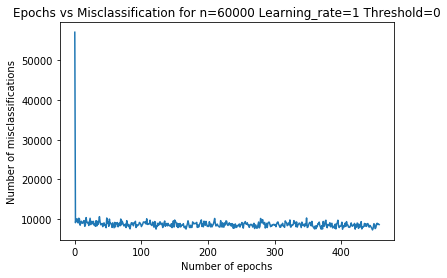

In [22]:
plt.plot(Mc)
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.title('Epochs vs Misclassification for n=60000 Learning_rate=1 Threshold=0')
plt.show()

# Assigning values to the Learning rate, Threshold, Number of samples to be tested, Initializing Error with 0

In [42]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=0.1
Mc=[]                                 #Storing the misclassification values after every epoch
n=10000                                  #Number of training elements

# Testing the test set images and lables with weights obtained in the previous step; Calculating the total number of misclassifications and percentage of misclassifications

With the updated weights in the previous step, we calculate the percentage of misclassifications in the test dataset. It is seen that the Percentage of misclassification is 11.16. Hence, with the previous observations we can infer that with more data being trained, the network adapts well thereby decreasing the percentage of error. The convergence is also a measure of learning rate and the threshold value. 


In [43]:
for i in range(n):
    v = np.matmul(W,X_test[i])
    c=np.argmax(v)

        
    if c != y_test[i]:
        errors=errors+1
#        elif c == y_train[i]:
#            errors=0

print('Total number of misclassification: ',errors)
print('Percentage of misclassification: ',errors*100/n)
#    epoch=epoch+1

for j in range(n):
    v1=np.matmul(W,X_test[j])      #W*Xi
    U=np.heaviside(v1,1)            #U(W*X)
    d=np.eye(10)[y_test[j]]
    Y=d-U                           #d(x)-U(W*X)
    Y=Y.reshape(10,1)
    X_tt=X_test[j].reshape(1,784)
    Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
    W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                            #W=W+lr*(d(x)-U(W*X))*X'

Total number of misclassification:  1116
Percentage of misclassification:  11.16


# Assigning values to the Learning rate, Threshold, Number of samples to be trained, Initializing the Weight vector with random values Setting epoch to 0 and Error with 0

The entire training dataset with 60000 samples is considered.


In [58]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=1
t=0.13                                   #Setting the threshold to 0.15
Mc=[]                                 #Storing the misclassification values after every epoch
n=60000                               #Number of training elements
epoch=0
W=np.zeros((10,784))
W=np.random.rand(10,784)

# Counting the misclassifications until the training dataset converges with respect to the given threshold

In [59]:
while(epoch==0 or Mc[epoch-1]/n > t): 
    errors = 0
    for i in range(n):
        v = np.matmul(W,X_train[i])
        c=np.argmax(v)

        
        if c != y_train[i]:
            errors=errors+1
#        elif c == y_train[i]:
#            errors=0
    
    Mc.append(errors)
    #print(Mc)    
    epoch=epoch+1


    for j in range(n):
        v1=np.matmul(W,X_train[j])      #W*Xi
        U=np.heaviside(v1,1)            #U(W*X)
        d=np.eye(10)[y_train[j]]
        Y=d-U                           #d(x)-U(W*X)
        Y=Y.reshape(10,1)
        X_tt=X_train[j].reshape(1,784)
        Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
        W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                        #W=W+lr*(d(x)-U(W*X))*X'

# Plot between Epochs and Misclassification of the training dataset with 60000 samples


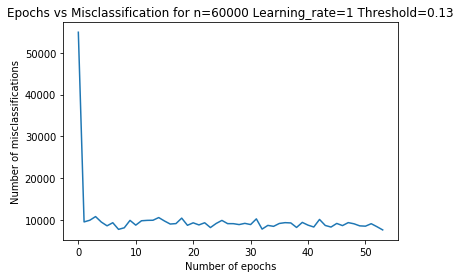

In [60]:
plt.plot(Mc)
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.title('Epochs vs Misclassification for n=60000 Learning_rate=1 Threshold=0.13')
plt.show()

# Testing the test set images and lables with weights obtained in the previous step; Calculating the total number of misclassifications and percentage of misclassifications
With the updated weights in the previous step, we calculate the percentage of misclassifications in the test dataset. It is seen that the Percentage of misclassification is 16.65.

In [61]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=0.1
Mc=[]                                 #Storing the misclassification values after every epoch
n=10000                                  #Number of training elements

In [62]:
for i in range(n):
    v = np.matmul(W,X_test[i])
    c=np.argmax(v)

        
    if c != y_test[i]:
        errors=errors+1
#        elif c == y_train[i]:
#            errors=0

print('Total number of misclassification: ',errors)
print('Percentage of misclassification: ',errors*100/n)
#    epoch=epoch+1

for j in range(n):
    v1=np.matmul(W,X_test[j])      #W*Xi
    U=np.heaviside(v1,1)            #U(W*X)
    d=np.eye(10)[y_test[j]]
    Y=d-U                           #d(x)-U(W*X)
    Y=Y.reshape(10,1)
    X_tt=X_test[j].reshape(1,784)
    Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
    W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                            #W=W+lr*(d(x)-U(W*X))*X'

Total number of misclassification:  1665
Percentage of misclassification:  16.65


# Assigning values to the Learning rate, Threshold, Number of samples to be trained, Initializing the Weight vector with random values Setting epoch to 0 and Error with 0.

The entire training dataset with 60000 samples is considered.

In [63]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=1
t=0.13                                   #Setting the threshold to 0.13
Mc=[]                                 #Storing the misclassification values after every epoch
n=60000                               #Number of training elements
epoch=0
W=np.zeros((10,784))
W=np.random.rand(10,784)

# Counting the misclassifications until the training dataset converges with respect to the given threshold

In [64]:
while(epoch==0 or Mc[epoch-1]/n > t): 
    errors = 0
    for i in range(n):
        v = np.matmul(W,X_train[i])
        c=np.argmax(v)

        
        if c != y_train[i]:
            errors=errors+1
#        elif c == y_train[i]:
#            errors=0
    
    Mc.append(errors)
    #print(Mc)    
    epoch=epoch+1


    for j in range(n):
        v1=np.matmul(W,X_train[j])      #W*Xi
        U=np.heaviside(v1,1)            #U(W*X)
        d=np.eye(10)[y_train[j]]
        Y=d-U                           #d(x)-U(W*X)
        Y=Y.reshape(10,1)
        X_tt=X_train[j].reshape(1,784)
        Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
        W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                        #W=W+lr*(d(x)-U(W*X))*X'

# Plot between Epochs and Misclassification of the training dataset with 60000 samples

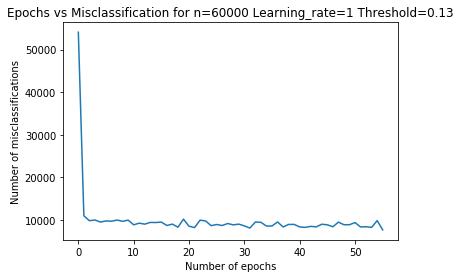

In [65]:
plt.plot(Mc)
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.title('Epochs vs Misclassification for n=60000 Learning_rate=1 Threshold=0.13')
plt.show()

# Testing the test set images and lables with weights obtained in the previous step; Calculating the total number of misclassifications and percentage of misclassifications
With the updated weights in the previous step, we calculate the percentage of misclassifications in the test dataset. It is seen that the Percentage of misclassification is 16.84.

In [66]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=0.1
Mc=[]                                 #Storing the misclassification values after every epoch
n=10000                                  #Number of training elements

In [67]:
for i in range(n):
    v = np.matmul(W,X_test[i])
    c=np.argmax(v)

        
    if c != y_test[i]:
        errors=errors+1
#        elif c == y_train[i]:
#            errors=0

print('Total number of misclassification: ',errors)
print('Percentage of misclassification: ',errors*100/n)
#    epoch=epoch+1

for j in range(n):
    v1=np.matmul(W,X_test[j])      #W*Xi
    U=np.heaviside(v1,1)            #U(W*X)
    d=np.eye(10)[y_test[j]]
    Y=d-U                           #d(x)-U(W*X)
    Y=Y.reshape(10,1)
    X_tt=X_test[j].reshape(1,784)
    Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
    W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                            #W=W+lr*(d(x)-U(W*X))*X'

Total number of misclassification:  1684
Percentage of misclassification:  16.84


# Assigning values to the Learning rate, Threshold, Number of samples to be trained, Initializing the Weight vector with random values Setting epoch to 0 and Error with 0.
The entire training dataset with 60000 samples is considered.

In [68]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=1
t=0.13                                   #Setting the threshold to 0.15
Mc=[]                                 #Storing the misclassification values after every epoch
n=60000                               #Number of training elements
epoch=0
W=np.zeros((10,784))
W=np.random.rand(10,784)

# Counting the misclassifications until the training dataset converges with respect to the given threshold


In [69]:
while(epoch==0 or Mc[epoch-1]/n > t): 
    errors = 0
    for i in range(n):
        v = np.matmul(W,X_train[i])
        c=np.argmax(v)

        
        if c != y_train[i]:
            errors=errors+1
#        elif c == y_train[i]:
#            errors=0
    
    Mc.append(errors)
    #print(Mc)    
    epoch=epoch+1


    for j in range(n):
        v1=np.matmul(W,X_train[j])      #W*Xi
        U=np.heaviside(v1,1)            #U(W*X)
        d=np.eye(10)[y_train[j]]
        Y=d-U                           #d(x)-U(W*X)
        Y=Y.reshape(10,1)
        X_tt=X_train[j].reshape(1,784)
        Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
        W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                        #W=W+lr*(d(x)-U(W*X))*X'

# Plot between Epochs and Misclassification of the training dataset with 60000 samples


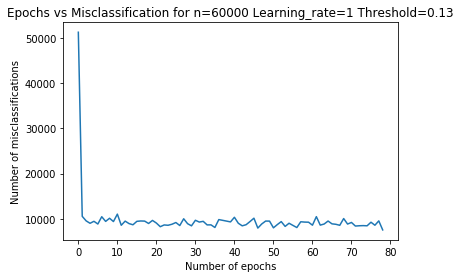

In [70]:
plt.plot(Mc)
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.title('Epochs vs Misclassification for n=60000 Learning_rate=1 Threshold=0.13')
plt.show()

# Testing the test set images and lables with weights obtained in the previous step; Calculating the total number of misclassifications and percentage of misclassifications
With the updated weights in the previous step, we calculate the percentage of misclassifications in the test dataset. It is seen that the Percentage of misclassification is 16.07.

In [71]:
errors=0                              #Initializing the misclassifications
lr=1                                  #Setting the learning rate=0.1
Mc=[]                                 #Storing the misclassification values after every epoch
n=10000                                  #Number of training elements

In [72]:
for i in range(n):
    v = np.matmul(W,X_test[i])
    c=np.argmax(v)

        
    if c != y_test[i]:
        errors=errors+1
#        elif c == y_train[i]:
#            errors=0

print('Total number of misclassification: ',errors)
print('Percentage of misclassification: ',errors*100/n)
#    epoch=epoch+1

for j in range(n):
    v1=np.matmul(W,X_test[j])      #W*Xi
    U=np.heaviside(v1,1)            #U(W*X)
    d=np.eye(10)[y_test[j]]
    Y=d-U                           #d(x)-U(W*X)
    Y=Y.reshape(10,1)
    X_tt=X_test[j].reshape(1,784)
    Q=np.matmul(Y,X_tt)             #(d(x)-U(W*X))*X'
    W=W + lr*Q                      #Broke the weight update equation into smaller parts for understanding.
                                            #W=W+lr*(d(x)-U(W*X))*X'

Total number of misclassification:  1607
Percentage of misclassification:  16.07


For a given threshold=0.13, 60000 samples have been trained thrice with different initial weights and seems to have converged with lesser epochs. While testing for misclassifications with the updated weights on the test sample, The percentage of misclassification is recorded as 16.65, 16.84 and 16.07 respectively for every trial. 